<a href="https://colab.research.google.com/github/fleshgordo/cocreate22/blob/main/002_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraping data from the web

In this exercise we will work with the [xeno-canto](https://xeno-canto.org/) archive of bird recordings. 

### Requirements

- Download and install [Insomnia](https://insomnia.rest/download). It's a tool that helps to quickly test an [API](https://en.wikipedia.org/wiki/API#Web_APIs) on the web.

A basic search URL looks like:

````
https://www.xeno-canto.org/api/2/recordings?
 
````

As described in the [API documentation](https://xeno-canto.org/explore/api) you can pass several parameters in order to filter your search. This parameters are added to the end of the URL as shown in the screenshot from Insomnia:

![alt text](https://github.com/fleshgordo/cocreate22/raw/main/img/insomnia_query.jpg "Title")

The URL looks like this:
````
https://www.xeno-canto.org/api/2/recordings?query=sparrow
 
````

The response to this query is in the format of JavaScript Object Notation (JSON). One can observer the number of Recordings (16488 in total) and the number of species (125). 

The entry recordings is a list that contains all recordings related to the search.

Furter query parameters (such as time, geolocation, search terms) are possible. For

## Scraping data with python 

First we are importing some addtional python packages which we will use for this scraping exercise.

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import mplleaflet

In [ ]:
# if no module 'mplleaflet', install it using pip
# then run the code above again
!pip install mplleaflet

# scrape from xeno-canto

In [4]:
#params= "cnt:'brazil'"
params = "cnt:switzerland loc:basel"
url="https://www.xeno-canto.org/api/2/recordings?query="+params
print(url)

r=requests.get(url, headers={"Content-Type":"json"})
resp = r.json()
print(resp)

https://www.xeno-canto.org/api/2/recordings?query=cnt:switzerland loc:basel
{'numRecordings': '150', 'numSpecies': '50', 'page': 1, 'numPages': 1, 'recordings': [{'id': '383063', 'gen': 'Tachymarptis', 'sp': 'melba', 'ssp': '', 'en': 'Alpine Swift', 'rec': 'Peter Ertl', 'cnt': 'Switzerland', 'loc': 'Basel, Basel-Stadt, Basel-Stadt', 'lat': '47.5734', 'lng': '7.5767', 'alt': '260', 'type': 'call', 'url': '//xeno-canto.org/383063', 'file': 'https://xeno-canto.org/383063/download', 'file-name': 'XC383063-alpensegler.mp3', 'sono': {'small': '//xeno-canto.org/sounds/uploaded/ZGGFYJIGKA/ffts/XC383063-small.png', 'med': '//xeno-canto.org/sounds/uploaded/ZGGFYJIGKA/ffts/XC383063-med.png', 'large': '//xeno-canto.org/sounds/uploaded/ZGGFYJIGKA/ffts/XC383063-large.png', 'full': '//xeno-canto.org/sounds/uploaded/ZGGFYJIGKA/ffts/XC383063-full.png'}, 'lic': '//creativecommons.org/licenses/by-nc-sa/4.0/', 'q': 'A', 'length': '0:13', 'time': '09:30', 'date': '2017-08-14', 'uploaded': '2017-08-14', 'al

In [5]:
df = pd.DataFrame.from_dict(resp["recordings"])
df.head()
#ef = df.loc[df["en"] == "Greater Rhea"]
#display(ef)

,id,gen,sp,ssp,en,rec,cnt,loc,lat,lng,...,lic,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used
0,383063,Tachymarptis,melba,,Alpine Swift,Peter Ertl,Switzerland,"Basel, Basel-Stadt, Basel-Stadt",47.5734,7.5767,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:13,09:30,2017-08-14,2017-08-14,[],call from a nest,unknown,unknown
1,530514,Gallinula,chloropus,,Common Moorhen,Samuel Büttler,Switzerland,"Basel, Basel-Stadt, Basel-Stadt",47.5401,7.5965,...,//creativecommons.org/licenses/by-nc-sa/4.0/,C,0:07,05:00,2020-02-27,2020-02-27,[],,no,no
2,719785,Milvus,migrans,,Black Kite,Nicolas Martinez,Switzerland,"Brislach, Laufen District, Basel-Landschaft",47.4312,7.5357,...,//creativecommons.org/licenses/by-nc-sa/4.0/,B,1:16,08:15,2022-04-27,2022-04-27,[],,yes,no
3,530385,Tyto,alba,,Western Barn Owl,Samuel Büttler,Switzerland,"Basel, Basel-Stadt, Basel-Stadt",47.5399,7.5964,...,//creativecommons.org/licenses/by-nc-sa/4.0/,B,0:07,03:50,2020-02-25,2020-02-26,[],,no,no
4,534666,Bubo,bubo,,Eurasian Eagle-Owl,Jaro Schacht,Switzerland,Basel-Land,None,None,...,//creativecommons.org/licenses/by-nc-sa/4.0/,B,0:20,20:30,2020-03-14,2020-03-15,[],,yes,unknown


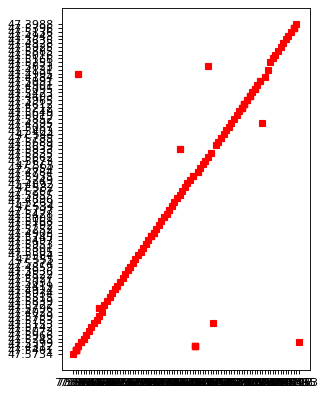

In [7]:
fig = plt.figure(figsize=(4, 6), dpi=80)
#print(df['lat'].fillna(value="0").values, df['lng'].fillna(value="0").values)

plt.plot(df['lng'].dropna().values, df['lat'].dropna().values, 'rs')

In [8]:
mplleaflet.display(fig=fig)
#mplleaflet.show()

/Users/selena.savic/opt/anaconda3/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## References and Links

- Learn [Python the hard way](https://learnpythonthehardway.org/book/)
- [Web scraper in python](https://first-web-scraper.readthedocs.io/en/latest/) great and exhaustive tutorial
- [Curl converter](https://curlconverter.com/python/) prepares request in correct format

